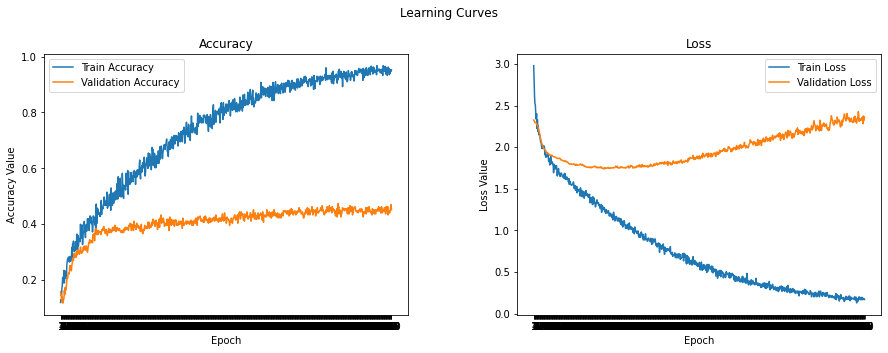

In [6]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# GOOGLE COLAB
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  # mount google drive directories
  from google.colab import drive
  drive.mount('/content/gdrive')  

  # execute, log on google drive and click the folder image on the left and 
  # replace the code_folder path (below) to the folder path of this ipynb file
  code_folder = '/content/gdrive/MyDrive/Colab Notebooks' 
  
  # change to the right folder
  %cd "$code_folder"
  !ls 

data_path = 'features.csv'
data = pd.read_csv(data_path, header=None)
X = data.loc[:, :1023]
y = data[1024]
filename = data[1025]

X_train, X_test, y_train, y_test, filename_train, filename_test = train_test_split(X, y, filename, test_size=0.33, random_state=42)

labels = []
for label in y_train:
  if (label == "blues"):
    labels.append(0)
  if (label == "classical"):
    labels.append(1)
  if (label == "country"):
    labels.append(2)
  if (label == "disco"):
    labels.append(3)
  if (label == "hiphop"):
    labels.append(4)
  if (label == "jazz"):
    labels.append(5)
  if (label == "metal"):
    labels.append(6)
  if (label == "pop"):
    labels.append(7)
  if (label == "reggae"):
    labels.append(8)
  if (label == "rock"):
    labels.append(9)

labels2 = []
for label in y_test:
  if (label == "blues"):
    labels2.append(0)
  if (label == "classical"):
    labels2.append(1)
  if (label == "country"):
    labels2.append(2)
  if (label == "disco"):
    labels2.append(3)
  if (label == "hiphop"):
    labels2.append(4)
  if (label == "jazz"):
    labels2.append(5)
  if (label == "metal"):
    labels2.append(6)
  if (label == "pop"):
    labels2.append(7)
  if (label == "reggae"):
    labels2.append(8)
  if (label == "rock"):
    labels2.append(9)

y_train = tf.convert_to_tensor(labels)
# y_test = tf.convert_to_tensor(labels2)
X_train, X_valid = X_train[:400], X_train[400:]
y_train, y_valid = y_train[:400], y_train[400:]

X_train = tf.reshape(X_train, (-1, 1024, 1))
X_valid = tf.reshape(X_valid, (-1, 1024, 1))
X_test = tf.reshape(X_test, (-1, 1024, 1))

X_train = (X_train - np.mean(X_train)) / np.std(X_train)
X_valid = (X_valid - np.mean(X_valid)) / np.std(X_valid)
X_test = (X_test - np.mean(X_test)) / np.std(X_test)

# concatenate the arrays
# X_test = np.reshape(X_test, (330, 1024))

# y_test = np.array(y_test).reshape(-1, 1)

# test = np.concatenate((X_test, y_test), axis=1)

# # save to csv
# df = pd.DataFrame(test)
# df.to_csv('test.csv', header=False, index=False)
# Create a simple model
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv1D(8, kernel_size=3, activation='selu', input_shape=(1024, 1)),
#     tf.keras.layers.MaxPooling1D(pool_size=2),
#     tf.keras.layers.Conv1D(16, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(16, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(16, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(16, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(16, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(16, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(16, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(16, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(16, kernel_size=16, activation='selu'),
#     tf.keras.layers.MaxPooling1D(pool_size=2),
#     tf.keras.layers.Conv1D(16, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(16, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(32, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(64, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(64, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(64, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(128, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(128, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(128, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(128, kernel_size=16, activation='selu'),
#     tf.keras.layers.Conv1D(128, kernel_size=16, activation='selu'),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='selu'),
#     tf.keras.layers.Dense(256, activation='selu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(32, activation='selu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(32, activation='selu'),
#     tf.keras.layers.Dense(32, activation='selu'),
#     tf.keras.layers.Dense(32, activation='selu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(32, activation='selu'),
#     tf.keras.layers.Dense(32, activation='selu'),
#     tf.keras.layers.Dense(32, activation='selu'),
#     tf.keras.layers.Dense(64, activation='selu'),
#     tf.keras.layers.Dense(8, activation='selu'),

#     tf.keras.layers.Dense(10, activation='softmax')
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(8, kernel_size=3, activation='selu', input_shape=(1024, 1)),
    tf.keras.layers.Conv1D(8,kernel_size=3,strides=1),
    tf.keras.layers.BatchNormalization(axis=2),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling1D(2)  ,
    tf.keras.layers.Conv1D(16,kernel_size=3,strides = 1),
    tf.keras.layers.BatchNormalization(axis=2),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling1D(2)  ,
    tf.keras.layers.Conv1D(32,kernel_size=3,strides = 1),
    tf.keras.layers.BatchNormalization(axis=2),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64,kernel_size=3,strides=1),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(128,kernel_size=3,strides=1),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling1D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

LEARNING_RATE = 0.0005
DECAY = 0.01

optimizer_fcn = tf.keras.optimizers.SGD(LEARNING_RATE)
loss_fcn = tf.keras.losses.SparseCategoricalCrossentropy()
metrics_fcn = tf.keras.metrics.SparseCategoricalAccuracy()

# Compile the model
model.compile(optimizer=optimizer_fcn, loss=loss_fcn, metrics=metrics_fcn)

print(X_train.shape)

# Fit the model to your training data
history = model.fit(X_train, y_train, epochs=800, validation_data=(X_valid, y_valid))

# Convert the model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

import matplotlib.pyplot as plt
def learningCurves(history,title):
    #Learning curve plotting
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    t = f.suptitle(title, fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)

    epochs = list(range(1,800+1))
    ax1.plot(epochs, history['sparse_categorical_accuracy'], label='Train Accuracy')
    ax1.plot(epochs, history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
    ax1.set_xticks(epochs)
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    ax1.legend()

    ax2.plot(epochs, history['loss'], label='Train Loss')
    ax2.plot(epochs, history['val_loss'], label='Validation Loss')
    ax2.set_xticks(epochs)
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    ax2.legend()

learningCurves(history.history, 'Learning Curves')
